<center><h1>Code de la Nage du Requin</h1></center>

In [1]:
"""
Estimation de l'exécution d'une méthode autrement dit d'une fonction
"""

import time


__author__ = ["Ekaterina TOMILINA", "Jordan PROCTOR", "Vishwa ELANKUMARAN"]
__copyright__ = "Copyright 2020, La Nage du Requin"
__version__ = "1.0"
__maintainer__ = ["Ekaterina TOMILINA", "Jordan PROCTOR", "Vishwa ELANKUMARAN"]
__email__ = ["ekaterina.tomilina@etu.u-bordeaux.fr",
             "vishwa.elankumaran@etu.u-bordeaux.fr",
             "jordan.proctor@etu.u-bordeaux.fr,"]
__status__ = "finished"


def timeit(method):
    """
            Initialisation des variables

            Parameters
            ----------
                method -> a method

            Returns
            -------
            str
                Le temps d'exécution d'une fonction
    """
    def timed(*args, **kw):
        """
                Initialisation des paramètres

                Parameters
                ----------
                        args -> list
                        kw   -> list

                Returns
                -------
                str
                        Execution time of the given method
        """
        # On lance le timer
        ts = time.time()
        result = method(*args, **kw)
        # On arrete le timer
        te = time.time()

        print('%r (%r, %r) %2.2f sec' %
              (method.__name__, args, kw, te - ts))
        return result

    return timed


In [2]:
"""
La Nage du Requin
"""

import math
from random import choice, uniform
import matplotlib.pyplot as plot
import scipy.stats as st
from numpy import linspace

# Pour voir le temps d'éxecution
# import TimeExecution.Timer as Timer

__author__ = ["Ekaterina TOMILINA", "Jordan PROCTOR", "Vishwa ELANKUMARAN"]
__copyright__ = "Copyright 2020, La Nage du Requin"
__version__ = "3.0"
__maintainer__ = ["Ekaterina TOMILINA", "Jordan PROCTOR", "Vishwa ELANKUMARAN"]
__email__ = ["ekaterina.tomilina@etu.u-bordeaux.fr",
             "vishwa.elankumaran@etu.u-bordeaux.fr",
             "jordan.proctor@etu.u-bordeaux.fr,"]
__status__ = "in development"


class Requin():
    """La Nage du Requin est une marche aléatoire sur R"""

    def __init__(self, iteration: int, p: (float, int), alpha: (float, int),
                 sigma: (float, int) = 1):
        """
            Initialisation des variables et vérifiation des entrées.

            Parameters
            ----------
                    iteration -> le nombre d'itérations désirées (n)
                    p         -> le paramètre de la loi de Bernouilli
                    alpha     -> constante
                    sigma     -> paramètre d'échelle = 1 par défaut
        """

        # Initialisation des variables
        self.iteration: int = iteration
        self.p: (float, int) = p
        self.alpha: (float, int) = alpha
        self.sigma: (float, int) = sigma

        # Vérification des paramètre entrés
        self.verification()

        # Création de notre requin container
        self.requin: list = []

        # Création de la convergence du requin container
        self.convergenceRequin: list = []

        # Création du conteneur de l'histogramme
        self.hist: list = []

        # Calcul pour savoir dans quel cas on va se trouver
        self.case: (float, int) = self.p * self.alpha

        # Attribution du cas
        self.str_case: str = self.which_case()

    def which_case(self) -> str:
        """
            Check dans quel cas on est. Il existe que 3 cas

            Cas Sous Critique si alpha * p < 1
            Cas Critique      si alpha * p = 1
            Cas Critique      si alpha * p > 1

            Return
            ------
            str
                Renvoie le cas
        """
        return (
            "Cas Sous-Critique" if self.case < 1 else
            "Cas Critique" if self.case == 1 else "Cas Super-Critique")

    def reset(self):
        """
            Reinitialise les variables
        """
        self.requin: list = []
        self.convergenceRequin: list = []
        self.str_case: str = []
        self.hist: list = []

    def verification(self):
        """
            Vérification des inputs donnés par l'utilisateur
        """
        # Verification pour iteration
        if not isinstance(self.iteration, int):
            raise TypeError("le nombre d'itérations doit être un entier")
        elif self.iteration < 0:
            raise Exception("le nombre d'itérations doit être superieur à 0")

        # Vérification pour p
        if not isinstance(self.p, (int, float)):
            raise TypeError('p doit etre un int ou un float')
        elif self.p < 0 or self.p > 1:
            raise Exception("p doit etre entre 0 et 1")

        # Vérification pour alpha
        if not isinstance(self.alpha, (int, float)):
            raise TypeError('alpha doit etre un int ou un float')
        elif self.alpha <= 0 or self.alpha > 2:
            raise Exception("alpha doit etre entre 0 et 2")

        # Vérification pour sigma
        if not isinstance(self.sigma, (int, float)):
            raise TypeError('sigma doit etre un int ou un float')

    def modifier(self, iteration: (int, str) = "NA",
                 p: (float, int, str) = "NA",
                 alpha: (float, int, str) = "NA",
                 sigma: (float, int, str) = "NA"):
        """
            Modifications des variables et vérifiation des entrées.

            Parameters
            ----------
                    iteration -> le nombre d'itérations désirées (n)
                    p         -> le paramètre de la loi de Bernouilli
                    alpha     -> constante
                    sigma     -> paramètre d'échelle = 1 par défaut
        """

        # Modification des variables
        self.iteration: int = (
            iteration if iteration != 'NA' else self.iteration)
        self.p: (float, int) = p if p != 'NA' else self.p
        self.alpha: (float, int) = alpha if alpha != 'NA' else self.alpha
        self.sigma: (float, int) = sigma if sigma != 'NA' else self.sigma

        # Vérifications des inputs entrés
        self.verification()

        # On vide les requins crée avec les anciens paramètres
        self.reset()

        # Calcul pour savoir dans quel cas on va se trouver
        self.case: (float, int) = self.p * self.alpha

        # Attribution du cas
        self.str_case: str = self.which_case()

    @ timeit
    def build(self):
        """
            Création du requin, et de sa convergence
        """
        # Requin + sa convergence
        self.requin, self.convergenceRequin = self.buildRequinAndConvergence()

    def calcul_X(self, U: float, V: float) -> float:
        """
            Calcul de X

            Parameters
            ----------
                    U -> Une uniforme
                    V -> Une autre uniforme
                    U et V sont indépendants

            Returns
            -------
            float
                    Calcul de X
        """
        if self.alpha == 1:
            return math.tan((math.pi * U) / 2)

        # Dans le cas alpha différent de 1
        return math.sin((math.pi * self.alpha * U) / 2) / \
            (math.cos((math.pi * U) / 2)) ** (1 / self.alpha) * (math.cos(((1 - self.alpha) * math.pi * U) / 2) /
                                                                 (- math.log(V))) ** ((1 - self.alpha) / self.alpha)

    def convergence_cases(self, S_n_i: float, i: int) -> float:
        """
            Comportement asymptotique du requin

            Parameters
            ----------
                    S_n_i -> La valeur du requin au ième temps
                    i     -> Le temps i

            Return
            ------
            float
                    Le requin au temps i
        """
        # Cas Sous Critique
        if self.case < 1:
            return (1 / i) ** (1 / self.alpha) * S_n_i

        # Cas Critique
        elif self.case == 1:
            return (1 / (i * math.log(i))) ** (1 / self.alpha) * S_n_i

        # Cas Super Critique
        return (S_n_i / (i ** self.p))

    def buildRequinAndConvergence(self) -> (list, list):
        """
            Lancement du requin

        """
        def initialisation(U: float, V: float) -> list:
            """
                Initialisation de la position du requin

                Parameters
                ----------
                        U -> Une uniforme
                        V -> Une autre uniforme
                        U et V sont indépendants

                Returns
                -------
                list
                        Le requin
            """
            return [0, self.calcul_X(U, V)]

        # Initialisation du requin
        requin: list = initialisation(uniform(-1, 1), uniform(0, 1))

        # Initialisation de la convergence du requin
        convergenceRequin: list = [0, self.convergence_cases(requin[1], 2)]

        # Stocke les valeurs de X_k
        X_k: list = [element for element in requin[1:]]

        # Construction du requin
        for i in range(len(requin), self.iteration):
            U: float = uniform(0, 1)

            if U < self.p:
                # On choisit équiprobablement dans X_k
                # Et on met a jour X_k
                X_k.append(choice(X_k))

            else:
                # On calcul X
                # Et on met à jour X_k
                X_k.append(self.calcul_X(uniform(-1, 1), uniform(0, 1)))

            # On rajoute le nouvel element dans notre requin
            requin.append(requin[-1] + X_k[-1])

            # On calcule la convergence du requin au temps i
            convergenceRequin.append(self.convergence_cases(requin[-1], i + 1))

        return requin, convergenceRequin

    @ timeit
    def buildHistogramme(self, iteration: int = 3000):
        """
            Contruire un histogramme pour visualiser la loi du requin

            Parameters
            ----------
                iteration -> Le nombre d'itération voulu pour construire la loi
        """
        i: int = 0

        while i < iteration:
            requin: list = self.buildRequinAndConvergence()[1]

            if abs(requin[-1] - requin[int(0.90 * self.iteration)]) < 0.1:
                self.hist.append(requin[-1])
                i += 1

    def affichage_requin(self, which_requin: str = "NA"):
        """
            Affichage du requin sur un graphique

            Parameter
            ---------
                requin -> Les requins
        """
        # Si vous n'avez générer de requin alors on en génére un pour vous
        if len(self.requin) == 0:
            # Appel de la fonction pour générer le requin
            self.build()

        # Pour le titre du graphique
        add_str = ""

        # Si l'utilisateur ne rentre rien alors on met le requin par défaut
        if which_requin == "NA":
            requinAplot = self.requin

        # Si il rentre quelques mots clé concernant la convergence
        # alors on affiche la convergence du requin
        elif which_requin in ["convergence", "c", 'conv', "convergent", "cg"]:
            requinAplot = self.convergenceRequin
            add_str = "Convergence de la "

        # Sinon on plot le requin
        else:
            requinAplot = self.requin

        # On choisit une couleur au hasard
        randomColor: list = [uniform(0, 1) for i in range(3)]

        plot.plot(requinAplot, label=self.str_case, color=randomColor)
        plot.legend(loc='best')
        plot.xlabel("Temps")
        plot.ylabel("Parcours")
        plot.title("Trajectoire de la " + add_str + "Nage du Requin")
        plot.show()

    def affichage_histogramme(self, iteration: int = 3000):
        """
            Affichage de l'histogramme
        """
        # Si l'histogramme n'a pas été généré alors on en genere un
        if len(self.hist) == 0:
            # Générer un histogramme
            self.buildHistogramme(iteration)

        # On choisit une couleur au hasard
        randomColor: list = [uniform(0, 1) for i in range(3)]

        plot.hist(self.hist, density=True, bins=45, label="Distribution", ec="black", color=randomColor)
        plot.xlim([min(self.hist) - 0.5, max(self.hist) + 0.5])
        kde_xs = linspace(min(self.hist) - 0.5, max(self.hist) + 0.5, 301)
        kde = st.gaussian_kde(self.hist)
        plot.plot(kde_xs, kde.pdf(kde_xs), label="Densité")
        plot.legend(loc="best")
        plot.ylabel('Densité')
        plot.xlabel(self.str_case)
        plot.title("Histogramme avec alpha = " +
                   str(self.alpha) + " et p = " + str(self.p))
        plot.show()


'build' ((<__main__.Requin object at 0x7fde578787c0>,), {}) 0.03 sec


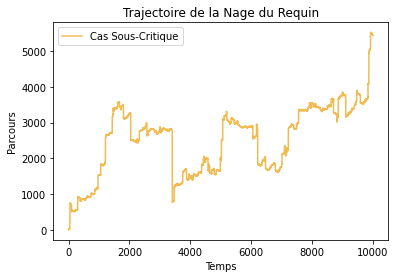

In [16]:
# Simulation

# Création de l'objet
simu = Requin(iteration = 10000, p = 1/4, alpha = 1, sigma = 1)

# Construction du requin
# Facultatif car automatisé dans la méthode affichage_requin
# simu.build()

# On affiche le requin
simu.affichage_requin()

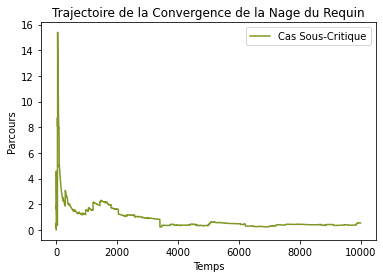

In [17]:
# On affiche la convergence de ce requin
simu.affichage_requin('convergence')

# Plusieurs moyens d'afficher sa convergence
# Pour aller plus vite
# simu.affichage_requin('c')
# simu.affichage_requin('cg')

'build' ((<__main__.Requin object at 0x7fde578787c0>,), {}) 0.03 sec


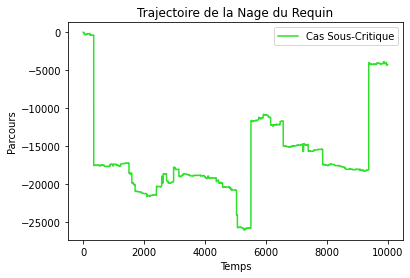

In [21]:
# Construisons un autre requin avec les mêmes paramètres
simu.build()

# Et affichons le
simu.affichage_requin()

'build' ((<__main__.Requin object at 0x7fde578787c0>,), {}) 0.02 sec


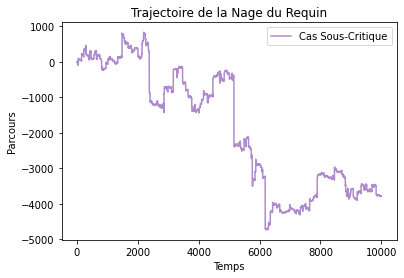

In [22]:
# Modifions les paramètres pour effectuer une autre simulation
# Changeons uniquement p et alpha
simu.modifier(p = 1/4, alpha = 1)

# Construction du requin
# a.build()

# Affichons le nouveau requin
simu.affichage_requin("requin")

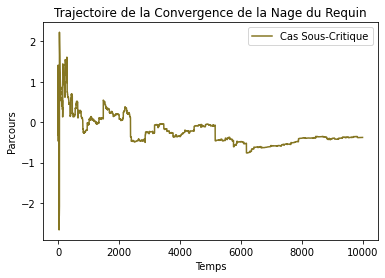

In [23]:
# Affichons sa convergence
simu.affichage_requin('c')

'buildHistogramme' ((<__main__.Requin object at 0x7fd0e38bad00>, 3000), {}) 178.42 sec


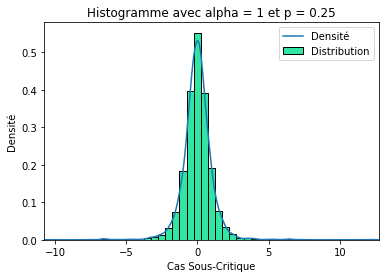

In [8]:
# Construisons un histogramme pour trouver la loi du requin
# Facultatif automatisé dans la fonction affichage_histogramme
# simu.buildHistogramme(iteration = 5000)

# Affichons l'histogramme du requin pour trouver sa loi
# Le résultat obtenu doit être une Loi de Cauchy
# Par défaut il y a 3000 itérations
simu.affichage_histogramme()
# PS : Il y a un temps d'attente variant en fonction du nombre d'itérations
# Ordre d'idée 1000 itérations -> temps d'attente d'environ 1min